In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [26]:
veri = pd.read_csv("owid-covid-data.csv")
veri.loc[0:4,"new_cases_smoothed"]=0
veri.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [27]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387253 entries, 0 to 387252
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387253 non-null  object 
 1   continent                                   368726 non-null  object 
 2   location                                    387253 non-null  object 
 3   date                                        387253 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375055 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376590 non-null  float64
 9   new_deaths_smoothed                         375360 non-null  float64
 

In [28]:
df1=pd.DataFrame(veri)
newCasesAfghanistan = df1[df1['location'] == 'Afghanistan']
newCasesAfghanistan = newCasesAfghanistan['new_cases']
newCasesAfghanistan = newCasesAfghanistan[newCasesAfghanistan.index % 7 == 0]
newCasesAfghanistan.head(50)



0         0.0
7         0.0
14        0.0
21        0.0
28        0.0
35        0.0
42        0.0
49        0.0
56        1.0
63        0.0
70        6.0
77       17.0
84       67.0
91      183.0
98      247.0
105     387.0
112     422.0
119     841.0
126    1392.0
133    2490.0
140    3813.0
147    4577.0
154    5108.0
161    4551.0
168    4195.0
175    2319.0
182    2056.0
189    1679.0
196     938.0
203     747.0
210     674.0
217     305.0
224     536.0
231     343.0
238     249.0
245     161.0
252     337.0
259     278.0
266     273.0
273     105.0
280     406.0
287     438.0
294     627.0
301     657.0
308     608.0
315    1002.0
322    1468.0
329    1463.0
336    1675.0
343    1311.0
Name: new_cases, dtype: float64

In [29]:
len(newCasesAfghanistan)

220

In [30]:
df2 = pd.DataFrame(veri)
newDeathsAfghanistan = df2[df2['location'] =='Afghanistan']
newDeathsAfghanistan = newDeathsAfghanistan['new_deaths']
newDeathsAfghanistan = newDeathsAfghanistan[newDeathsAfghanistan.index % 7 == 0]
newDeathsAfghanistan.head(50)

#df2 = pd.DataFrame(veri.new_deaths)
#newDeaths = df2[df2.index <= 1521]
#newDeaths = newDeaths[newDeaths.index % 7 == 0]
#newDeaths


0        0.0
7        0.0
14       0.0
21       0.0
28       0.0
35       0.0
42       0.0
49       0.0
56       0.0
63       0.0
70       0.0
77       0.0
84       2.0
91       3.0
98      10.0
105     15.0
112     13.0
119     21.0
126     41.0
133     48.0
140     58.0
147     37.0
154     79.0
161    124.0
168     97.0
175    155.0
182    123.0
189    149.0
196    172.0
203     99.0
210     37.0
217     24.0
224     63.0
231     15.0
238     17.0
245      7.0
252     11.0
259     17.0
266     16.0
273      9.0
280     11.0
287     15.0
294     23.0
301     25.0
308     20.0
315     49.0
322     70.0
329     77.0
336    113.0
343     95.0
Name: new_deaths, dtype: float64

In [31]:
len(newDeathsAfghanistan)

220

In [32]:
df3 = pd.DataFrame(veri)
newCasesSmoothedAfghanistan = df3[df3['location'] =='Afghanistan']

newCasesSmoothedAfghanistan = newCasesSmoothedAfghanistan['new_cases_smoothed']
newCasesSmoothedAfghanistan = newCasesSmoothedAfghanistan[newCasesSmoothedAfghanistan.index % 7 == 0]
newCasesSmoothedAfghanistan

#df3 = pd.DataFrame(veri.new_cases_smoothed)
#newCasesSmoothed = df3[df3.index <= 1521]
#newCasesSmoothed = newCasesSmoothed[newCasesSmoothed.index % 7 == 0]
#newCasesSmoothed

0        0.000
7        0.000
14       0.000
21       0.000
28       0.000
         ...  
1505    30.143
1512     0.000
1519     0.000
1526    32.571
1533    26.429
Name: new_cases_smoothed, Length: 220, dtype: float64

In [33]:
df4 = pd.DataFrame(veri)
diabetesPrevalenceAfghanistan = df4[df4['location'] =='Afghanistan']
diabetesPrevalenceAfghanistan = diabetesPrevalenceAfghanistan['diabetes_prevalence']
diabetesPrevalenceAfghanistan = diabetesPrevalenceAfghanistan[diabetesPrevalenceAfghanistan.index % 7 == 0]
diabetesPrevalenceAfghanistan

#df4 = pd.DataFrame(veri.diabetes_prevalence)
#diabetesPrevalence = df4[df4.index <= 1521]
#diabetesPrevalence = diabetesPrevalence[diabetesPrevalence.index % 7 == 0]
#diabetesPrevalence


0       9.59
7       9.59
14      9.59
21      9.59
28      9.59
        ... 
1505    9.59
1512    9.59
1519    9.59
1526    9.59
1533    9.59
Name: diabetes_prevalence, Length: 220, dtype: float64

In [34]:
df5 = pd.DataFrame(veri)
cardiovascDeathRateAfghanistan = df5[df5['location'] =='Afghanistan']
cardiovascDeathRateAfghanistan = cardiovascDeathRateAfghanistan['cardiovasc_death_rate']
cardiovascDeathRateAfghanistan = cardiovascDeathRateAfghanistan[cardiovascDeathRateAfghanistan.index % 7 == 0]
cardiovascDeathRateAfghanistan

#df5 = pd.DataFrame(veri.cardiovasc_death_rate)
#cardiovascDeathRate = df5[df5.index <= 1521]
#cardiovascDeathRate = cardiovascDeathRate[cardiovascDeathRate.index % 7 == 0]
#cardiovascDeathRate



0       597.029
7       597.029
14      597.029
21      597.029
28      597.029
         ...   
1505    597.029
1512    597.029
1519    597.029
1526    597.029
1533    597.029
Name: cardiovasc_death_rate, Length: 220, dtype: float64

In [35]:
df6 = pd.DataFrame(veri)
PoPulationAfghanistan = df6[df6['location'] =='Afghanistan']
PoPulationAfghanistan = PoPulationAfghanistan['population']
PoPulationAfghanistan = PoPulationAfghanistan[PoPulationAfghanistan.index % 7 == 0]
PoPulationAfghanistan


#df6 = pd.DataFrame(veri.population)
#PoPulation = df6[df6.index <= 1521]
#PoPulation = PoPulation[PoPulation.index % 7 == 0]
#PoPulation


0       41128772.0
7       41128772.0
14      41128772.0
21      41128772.0
28      41128772.0
           ...    
1505    41128772.0
1512    41128772.0
1519    41128772.0
1526    41128772.0
1533    41128772.0
Name: population, Length: 220, dtype: float64

In [36]:
X = np.column_stack((newCasesAfghanistan, newCasesSmoothedAfghanistan, diabetesPrevalenceAfghanistan, cardiovascDeathRateAfghanistan, PoPulationAfghanistan))


In [37]:
print(X.shape)


(220, 5)


In [38]:
y =  (newDeathsAfghanistan)
newDeathsAfghanistan.head(50)
y


0       0.0
7       0.0
14      0.0
21      0.0
28      0.0
       ... 
1505    0.0
1512    0.0
1519    0.0
1526    0.0
1533    0.0
Name: new_deaths, Length: 220, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state = 4555)

In [40]:
param_grid = {
    'n_estimators': list(range(20, 200, 10)),
    'max_depth': [10, 20]
}

In [41]:
best_score = float('inf')
best_params = None
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
        
        model = RandomForestRegressor( n_estimators=n_estimators,max_depth=max_depth)  
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        
        if mse < best_score:
            best_score = mse
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}  
print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)

En iyi parametreler: {'n_estimators': 50, 'max_depth': 10}
En iyi skor: 968.4954435064302


In [46]:
import time 
rf=RandomForestRegressor( n_estimators=n_estimators,random_state=16,max_depth=max_depth)
start_time = time.time()
rf.fit(X_train,y_train )
end_time = time.time()
trainTime = end_time - start_time
print(f" eğitim için geçen süre: {trainTime:.2f} saniye")
print("Train Başarısı = %",rf.score(X_train,y_train)*100)
print("Test Başarısı = %",rf.score(X_test,y_test)*100)

 eğitim için geçen süre: 0.21 saniye
Train Başarısı = % 94.24202462136542
Test Başarısı = % 92.14028879012429


In [47]:
y_pred = rf.predict(X_test)

In [56]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)

In [57]:
print("mean squared error",mse)
print("hata kareler",r2)
print("meanabsolute",mae)

mean squared error 1008.051518566181
hata kareler 0.9214028879012429
meanabsolute 18.766912071846285


In [22]:
X_new = np.array([[100,20,5,150,1000000]])
Afghanistan=rf.predict(X_new)
Afghanistan
#(newCasesAfghanistan, newCasesSmoothedAfghanistan, diabetesPrevalenceAfghanistan, cardiovascDeathRateAfghanistan, PoPulationAfghanistan))


array([3.9254386])

Text(0, 0.5, 'eğitilmiş model verileri')

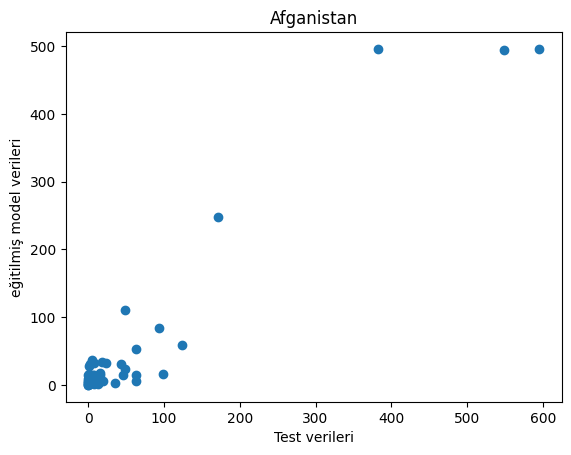

In [23]:
f = np.linspace(0, 400, 1000)  # 0 ile 40 arasında 1000 eşit aralıklı değer
k = f 
plt.figure()
plt.scatter(y_test,y_pred)
#plt.scatter(f, k)
plt.title("Afganistan")
plt.xlabel("Test verileri")
plt.ylabel("eğitilmiş model verileri")

In [24]:
df7 = pd.DataFrame(veri)
newCasesAustralia = df7[df7['location'] == 'Australia']
newCasesAustralia = newCasesAustralia['new_cases']
newCasesAustralia.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newCasesAustralia = newCasesAustralia[newCasesAustralia.index % 7 == 0]
newCasesAustralia.head(50)
print(len(newCasesAustralia))

220


In [158]:
df8 = pd.DataFrame(veri)
newDeathsAustralia = df8[df8['location'] == 'Australia']
newDeathsAustralia = newDeathsAustralia['new_deaths']
newDeathsAustralia.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık

newDeathsAustralia = newDeathsAustralia[newDeathsAustralia.index % 7 == 0]
newDeathsAustralia.head(50)
print(len(newDeathsAustralia))

220


In [159]:
df9 = pd.DataFrame(veri)
newCasesSmoothedsAustralia = df9[df9['location'] == 'Australia']
newCasesSmoothedsAustralia = newCasesSmoothedsAustralia['new_cases_smoothed']
newCasesSmoothedsAustralia.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık

newCasesSmoothedsAustralia = newCasesSmoothedsAustralia[newCasesSmoothedsAustralia.index % 7 == 0]
newCasesSmoothedsAustralia.head(50)


0          NaN
7        0.000
14       0.000
21       0.571
28       1.143
35       0.429
42       0.000
49       1.000
56       0.429
63       6.429
70      25.571
77     118.857
84     389.714
91     260.857
98      93.429
105     42.429
112     16.714
119     11.429
126     20.857
133     15.286
140     10.000
147     11.286
154     10.000
161      6.714
168     19.143
175     29.286
182    103.000
189    170.143
196    269.714
203    358.429
210    476.000
217    488.000
224    333.857
231    223.857
238    135.000
245     94.286
252     57.143
259     39.714
266     18.714
273     15.000
280     17.571
287     19.857
294     16.571
301     13.000
308      8.857
315      8.429
322     13.714
329     11.143
336     10.143
343      9.857
Name: new_cases_smoothed, dtype: float64

In [160]:
df10 = pd.DataFrame(veri)
diabetesPrevalenceAustralia = df10[df10['location'] == 'Australia']
diabetesPrevalenceAustralia = diabetesPrevalenceAustralia['diabetes_prevalence']
diabetesPrevalenceAustralia.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
diabetesPrevalenceAustralia = diabetesPrevalenceAustralia[diabetesPrevalenceAustralia.index % 7 == 0]
diabetesPrevalenceAustralia.head(50)
#print(len(diabetesPrevalenceAustralia))


0      5.07
7      5.07
14     5.07
21     5.07
28     5.07
35     5.07
42     5.07
49     5.07
56     5.07
63     5.07
70     5.07
77     5.07
84     5.07
91     5.07
98     5.07
105    5.07
112    5.07
119    5.07
126    5.07
133    5.07
140    5.07
147    5.07
154    5.07
161    5.07
168    5.07
175    5.07
182    5.07
189    5.07
196    5.07
203    5.07
210    5.07
217    5.07
224    5.07
231    5.07
238    5.07
245    5.07
252    5.07
259    5.07
266    5.07
273    5.07
280    5.07
287    5.07
294    5.07
301    5.07
308    5.07
315    5.07
322    5.07
329    5.07
336    5.07
343    5.07
Name: diabetes_prevalence, dtype: float64

In [161]:
df11 = pd.DataFrame(veri)
cardiovascDeathRateAustralia = df11[df11['location'] == 'Australia']
cardiovascDeathRateAustralia = cardiovascDeathRateAustralia['cardiovasc_death_rate']
cardiovascDeathRateAustralia.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
cardiovascDeathRateAustralia = cardiovascDeathRateAustralia[cardiovascDeathRateAustralia.index % 7 == 0]
cardiovascDeathRateAustralia.head(50)
print(len(cardiovascDeathRateAustralia))


220


In [162]:
df12 = pd.DataFrame(veri)
PoPulationAustralia = df12[df12['location'] == 'Australia']
PoPulationAustralia = PoPulationAustralia['population']
PoPulationAustralia.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
PoPulationAustralia = PoPulationAustralia[PoPulationAustralia.index % 7 == 0]
PoPulationAustralia.head(50)
print(len(PoPulationAustralia))



220


In [163]:
X = np.column_stack((newCasesAustralia, newCasesSmoothedsAustralia,diabetesPrevalenceAustralia, cardiovascDeathRateAustralia, PoPulationAustralia))
X


array([[0.000000e+00,          nan, 5.070000e+00, 1.077910e+02,
        2.617741e+07],
       [0.000000e+00, 0.000000e+00, 5.070000e+00, 1.077910e+02,
        2.617741e+07],
       [0.000000e+00, 0.000000e+00, 5.070000e+00, 1.077910e+02,
        2.617741e+07],
       ...,
       [7.247000e+03, 1.035286e+03, 5.070000e+00, 1.077910e+02,
        2.617741e+07],
       [6.474000e+03, 9.248570e+02, 5.070000e+00, 1.077910e+02,
        2.617741e+07],
       [5.566000e+03, 7.951430e+02, 5.070000e+00, 1.077910e+02,
        2.617741e+07]])

In [164]:
y=  (newDeathsAustralia)
y

0        0.0
7        0.0
14       0.0
21       0.0
28       0.0
        ... 
1505    41.0
1512    18.0
1519    57.0
1526    14.0
1533     2.0
Name: new_deaths, Length: 220, dtype: float64

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 455)

In [166]:
param_grid = {
    'n_estimators': list(range(20, 100, 10)),
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'test_size':[0.20, 0.25, 0.30]
}

In [167]:
best_score = float('inf')
best_params = None
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
       
        model = RandomForestRegressor( n_estimators=n_estimators,max_depth=max_depth)  
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        
        if mse < best_score:
            best_score = mse
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}  
print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)

En iyi parametreler: {'n_estimators': 70, 'max_depth': 10}
En iyi skor: 10263.501434730464


In [168]:
rf=RandomForestRegressor( n_estimators=n_estimators,random_state=61,max_depth=max_depth)
rf.fit(X_train,y_train )
print("Train Başarısı = %",rf.score(X_train,y_train)*100)
print("Test Başarısı = %",rf.score(X_test,y_test)*100)

Train Başarısı = % 87.35937854691744
Test Başarısı = % 35.51162469996791


In [169]:
X_new = np.array([[100,20,5,150,1000000]])
Australia=rf.predict(X_new)
Australia

array([5.43333333])

In [170]:
df13 = pd.DataFrame(veri)
newCasesBrazil = df3[df7['location'] == 'Brazil']
newCasesBrazil = newCasesBrazil['new_cases']
newCasesBrazil.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newCasesBrazil = newCasesBrazil[newCasesBrazil.index % 7 == 0]
newCasesBrazil.head(50)


0           0.0
7           0.0
14          0.0
21          0.0
28          0.0
35          0.0
42          0.0
49          0.0
56          1.0
63         12.0
70         71.0
77        820.0
84       2513.0
91       5639.0
98      10582.0
105     14044.0
112     19313.0
119     38594.0
126     53739.0
133     72895.0
140    112667.0
147    134276.0
154    180605.0
161    183039.0
168    204103.0
175    242061.0
182    264107.0
189    261746.0
196    245501.0
203    297038.0
210    319119.0
217    299957.0
224    313078.0
231    256810.0
238    272473.0
245    288029.0
252    189332.0
259    213019.0
266    194430.0
273    190910.0
280    175365.0
287    144412.0
294    153356.0
301    163002.0
308    114523.0
315    179471.0
322    209512.0
329    218186.0
336    295618.0
343    302259.0
Name: new_cases, dtype: float64

In [171]:
df14 = pd.DataFrame(veri)
newDeathsBrazil = df14[df14['location'] == 'Brazil']
newDeathsBrazil = newDeathsBrazil['new_deaths']
newDeathsBrazil.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık

newDeathsBrazil = newDeathsBrazil[newDeathsBrazil.index % 7 == 0]
newDeathsBrazil.head(50)


0         0.0
7         0.0
14        0.0
21        0.0
28        0.0
35        0.0
42        0.0
49        0.0
56        0.0
63        0.0
70        0.0
77       11.0
84       81.0
91      267.0
98      697.0
105    1085.0
112    1529.0
119    2659.0
126    3568.0
133    4920.0
140    6231.0
147    6830.0
154    7148.0
161    6802.0
168    7126.0
175    7007.0
182    7213.0
189    7224.0
196    7453.0
203    7387.0
210    7237.0
217    7097.0
224    6951.0
231    6835.0
238    6146.0
245    6017.0
252    4875.0
259    5397.0
266    4744.0
273    4851.0
280    4251.0
287    3575.0
294    3257.0
301    3006.0
308    2538.0
315    2722.0
322    3876.0
329    3361.0
336    3990.0
343    4473.0
Name: new_deaths, dtype: float64

In [172]:
df15 = pd.DataFrame(veri)
diabetesPrevalenceBrazil = df15[df15['location'] == 'Brazil']
diabetesPrevalenceBrazil = diabetesPrevalenceBrazil['diabetes_prevalence']
diabetesPrevalenceBrazil.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
diabetesPrevalenceBrazil = diabetesPrevalenceBrazil[diabetesPrevalenceBrazil.index % 7 == 0]
diabetesPrevalenceBrazil.head(50)
#print(len(diabetesPrevalenceAustralia))

0      8.11
7      8.11
14     8.11
21     8.11
28     8.11
35     8.11
42     8.11
49     8.11
56     8.11
63     8.11
70     8.11
77     8.11
84     8.11
91     8.11
98     8.11
105    8.11
112    8.11
119    8.11
126    8.11
133    8.11
140    8.11
147    8.11
154    8.11
161    8.11
168    8.11
175    8.11
182    8.11
189    8.11
196    8.11
203    8.11
210    8.11
217    8.11
224    8.11
231    8.11
238    8.11
245    8.11
252    8.11
259    8.11
266    8.11
273    8.11
280    8.11
287    8.11
294    8.11
301    8.11
308    8.11
315    8.11
322    8.11
329    8.11
336    8.11
343    8.11
Name: diabetes_prevalence, dtype: float64

In [173]:
df16 = pd.DataFrame(veri)
cardiovascDeathRateBrazil = df16[df16['location'] == 'Brazil']
cardiovascDeathRateBrazil = cardiovascDeathRateBrazil['cardiovasc_death_rate']
cardiovascDeathRateBrazil.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
cardiovascDeathRateBrazil = cardiovascDeathRateBrazil[cardiovascDeathRateBrazil.index % 7 == 0]
cardiovascDeathRateBrazil.head(50)


0      177.961
7      177.961
14     177.961
21     177.961
28     177.961
35     177.961
42     177.961
49     177.961
56     177.961
63     177.961
70     177.961
77     177.961
84     177.961
91     177.961
98     177.961
105    177.961
112    177.961
119    177.961
126    177.961
133    177.961
140    177.961
147    177.961
154    177.961
161    177.961
168    177.961
175    177.961
182    177.961
189    177.961
196    177.961
203    177.961
210    177.961
217    177.961
224    177.961
231    177.961
238    177.961
245    177.961
252    177.961
259    177.961
266    177.961
273    177.961
280    177.961
287    177.961
294    177.961
301    177.961
308    177.961
315    177.961
322    177.961
329    177.961
336    177.961
343    177.961
Name: cardiovasc_death_rate, dtype: float64

In [174]:
df17 = pd.DataFrame(veri)
PoPulationBrazil = df17[df17['location'] == 'Brazil']
PoPulationBrazil = PoPulationBrazil['population']
PoPulationBrazil.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
PoPulationBrazil = PoPulationBrazil[PoPulationBrazil.index % 7 == 0]
PoPulationBrazil.head(50)


0      215313504.0
7      215313504.0
14     215313504.0
21     215313504.0
28     215313504.0
35     215313504.0
42     215313504.0
49     215313504.0
56     215313504.0
63     215313504.0
70     215313504.0
77     215313504.0
84     215313504.0
91     215313504.0
98     215313504.0
105    215313504.0
112    215313504.0
119    215313504.0
126    215313504.0
133    215313504.0
140    215313504.0
147    215313504.0
154    215313504.0
161    215313504.0
168    215313504.0
175    215313504.0
182    215313504.0
189    215313504.0
196    215313504.0
203    215313504.0
210    215313504.0
217    215313504.0
224    215313504.0
231    215313504.0
238    215313504.0
245    215313504.0
252    215313504.0
259    215313504.0
266    215313504.0
273    215313504.0
280    215313504.0
287    215313504.0
294    215313504.0
301    215313504.0
308    215313504.0
315    215313504.0
322    215313504.0
329    215313504.0
336    215313504.0
343    215313504.0
Name: population, dtype: float64

In [175]:
df50 = pd.DataFrame(veri)
newCasesSmoothedsBrazil = df50[df50['location'] == 'Brazil']
newCasesSmoothedsBrazil = newCasesSmoothedsBrazil['new_cases_smoothed']
newCasesSmoothedsBrazil.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık

newCasesSmoothedsBrazil = newCasesSmoothedsBrazil[newCasesSmoothedsBrazil.index % 7 == 0]
newCasesSmoothedsBrazil.head(50)

0            NaN
7          0.000
14         0.000
21         0.000
28         0.000
35         0.000
42         0.000
49         0.000
56         0.143
63         1.714
70        10.143
77       117.143
84       359.000
91       805.571
98      1511.714
105     2006.286
112     2759.000
119     5513.429
126     7677.000
133    10413.571
140    16095.286
147    19182.286
154    25800.714
161    26148.429
168    29157.571
175    34580.143
182    37729.571
189    37392.286
196    35071.571
203    42434.000
210    45588.429
217    42851.000
224    44725.429
231    36687.143
238    38924.714
245    41147.000
252    27047.429
259    30431.286
266    27775.714
273    27272.857
280    25052.143
287    20630.286
294    21908.000
301    23286.000
308    16360.429
315    25638.714
322    29930.286
329    31169.429
336    42231.143
343    43179.857
Name: new_cases_smoothed, dtype: float64

In [176]:
X = np.column_stack((newCasesBrazil, diabetesPrevalenceBrazil, cardiovascDeathRateBrazil, PoPulationBrazil,newCasesSmoothedsBrazil))
X

array([[0.00000000e+00, 8.11000000e+00, 1.77961000e+02, 2.15313504e+08,
                   nan],
       [0.00000000e+00, 8.11000000e+00, 1.77961000e+02, 2.15313504e+08,
        0.00000000e+00],
       [0.00000000e+00, 8.11000000e+00, 1.77961000e+02, 2.15313504e+08,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 8.11000000e+00, 1.77961000e+02, 2.15313504e+08,
        0.00000000e+00],
       [0.00000000e+00, 8.11000000e+00, 1.77961000e+02, 2.15313504e+08,
        0.00000000e+00],
       [0.00000000e+00, 8.11000000e+00, 1.77961000e+02, 2.15313504e+08,
        0.00000000e+00]])

In [177]:
y=  (newDeathsBrazil)
y

0       0.0
7       0.0
14      0.0
21      0.0
28      0.0
       ... 
1505    0.0
1512    0.0
1519    0.0
1526    0.0
1533    0.0
Name: new_deaths, Length: 220, dtype: float64

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45)

In [179]:
param_grid = {
    'n_estimators': list(range(50, 500,50 )),
    'max_depth': [10, 20]
}

In [180]:
best_score = float('inf')
best_params = None
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
        
        model = RandomForestRegressor( n_estimators=n_estimators,max_depth=max_depth)  
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        
        if mse < best_score:
            best_score = mse
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}  
print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)

En iyi parametreler: {'n_estimators': 350, 'max_depth': 20}
En iyi skor: 10417140.126715029


In [181]:
rf=RandomForestRegressor( n_estimators=n_estimators,random_state=50,max_depth=max_depth)
rf.fit(X_train,y_train )
print("Train Başarısı = %",rf.score(X_train,y_train)*100)
print("Test Başarısı = %",rf.score(X_test,y_test)*100)

Train Başarısı = % 93.18860441812969
Test Başarısı = % 54.743286266624125


In [182]:
X_new = np.array([[100,20,5,150,1000000]])
Brazil=rf.predict(X_new)
Brazil

array([4986.57555556])

In [183]:
df18 = pd.DataFrame(veri)
newCasesChina = df18[df18['location'] == 'China']
newCasesChina = newCasesChina['new_cases']
newCasesChina.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newCasesChina = newCasesChina[newCasesChina.index % 7 == 0]
newCasesChina.head(50)

0          1.0
7         44.0
14        80.0
21      1860.0
28     12426.0
35     22840.0
42     31333.0
49      8458.0
56      2926.0
63       891.0
70       189.0
77       450.0
84       843.0
91       589.0
98       552.0
105      719.0
112      137.0
119       55.0
126       37.0
133       54.0
140       41.0
147       45.0
154       59.0
161      100.0
168      268.0
175      193.0
182      116.0
189      216.0
196      415.0
203      902.0
210     1463.0
217      847.0
224      612.0
231      380.0
238      210.0
245      166.0
252      149.0
259      174.0
266      126.0
273      155.0
280      184.0
287      184.0
294      185.0
301      247.0
308      274.0
315      233.0
322      220.0
329      681.0
336      831.0
343      790.0
Name: new_cases, dtype: float64

In [184]:
df19 = pd.DataFrame(veri)
newDeathsChina = df19[df19['location'] == 'China']
newDeathsChina = newDeathsChina['new_deaths']
newDeathsChina.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newDeathsChina = newDeathsChina[newDeathsChina.index % 7 == 0]
newDeathsChina.head(50)

0         0.0
7         1.0
14        2.0
21       53.0
28      305.0
35      544.0
42      862.0
49      679.0
56      427.0
63      228.0
70      103.0
77       63.0
84       39.0
91       32.0
98       11.0
105    1293.0
112       0.0
119       1.0
126       0.0
133       2.0
140       0.0
147       0.0
154       0.0
161       0.0
168       1.0
175       2.0
182       0.0
189       0.0
196       5.0
203       6.0
210      15.0
217      14.0
224      22.0
231       7.0
238      11.0
245       7.0
252       6.0
259       3.0
266       2.0
273       0.0
280       0.0
287       0.0
294       0.0
301       0.0
308       2.0
315       1.0
322       0.0
329       1.0
336       3.0
343       3.0
Name: new_deaths, dtype: float64

In [185]:
df20 = pd.DataFrame(veri)
newCasesSmoothedChina = df20[df20['location'] == 'China']
newCasesSmoothedChina = newCasesSmoothedChina['new_cases_smoothed']
newCasesSmoothedChina.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newCasesSmoothedChina = newCasesSmoothedChina[newCasesSmoothedChina.index % 7 == 0]
newCasesSmoothedChina.head(50)

0           NaN
7         6.286
14       11.429
21      265.714
28     1775.143
35     3262.857
42     4476.143
49     1208.286
56      418.000
63      127.286
70       27.000
77       64.286
84      120.429
91       84.143
98       78.857
105     102.714
112      19.571
119       7.857
126       5.286
133       7.714
140       5.857
147       6.429
154       8.429
161      14.286
168      38.286
175      27.571
182      16.571
189      30.857
196      59.286
203     128.857
210     209.000
217     121.000
224      87.429
231      54.286
238      30.000
245      23.714
252      21.286
259      24.857
266      18.000
273      22.143
280      26.286
287      26.286
294      26.429
301      35.286
308      39.143
315      33.286
322      31.429
329      97.286
336     118.714
343     112.857
Name: new_cases_smoothed, dtype: float64

In [186]:
df21 = pd.DataFrame(veri)
diabetesPrevalenceChina = df21[df21['location'] == 'China']
diabetesPrevalenceChina = diabetesPrevalenceChina['diabetes_prevalence']
diabetesPrevalenceChina.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
diabetesPrevalenceChina = diabetesPrevalenceChina[diabetesPrevalenceChina.index % 7 == 0]
diabetesPrevalenceChina.head(50)

0      9.74
7      9.74
14     9.74
21     9.74
28     9.74
35     9.74
42     9.74
49     9.74
56     9.74
63     9.74
70     9.74
77     9.74
84     9.74
91     9.74
98     9.74
105    9.74
112    9.74
119    9.74
126    9.74
133    9.74
140    9.74
147    9.74
154    9.74
161    9.74
168    9.74
175    9.74
182    9.74
189    9.74
196    9.74
203    9.74
210    9.74
217    9.74
224    9.74
231    9.74
238    9.74
245    9.74
252    9.74
259    9.74
266    9.74
273    9.74
280    9.74
287    9.74
294    9.74
301    9.74
308    9.74
315    9.74
322    9.74
329    9.74
336    9.74
343    9.74
Name: diabetes_prevalence, dtype: float64

In [187]:
df22 = pd.DataFrame(veri)
cardiovascDeathRateChina = df22[df22['location'] == 'China']
cardiovascDeathRateChina = cardiovascDeathRateChina['cardiovasc_death_rate']
cardiovascDeathRateChina.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
cardiovascDeathRateChina = cardiovascDeathRateChina[cardiovascDeathRateChina.index % 7 == 0]
cardiovascDeathRateChina.head(50)

0      261.899
7      261.899
14     261.899
21     261.899
28     261.899
35     261.899
42     261.899
49     261.899
56     261.899
63     261.899
70     261.899
77     261.899
84     261.899
91     261.899
98     261.899
105    261.899
112    261.899
119    261.899
126    261.899
133    261.899
140    261.899
147    261.899
154    261.899
161    261.899
168    261.899
175    261.899
182    261.899
189    261.899
196    261.899
203    261.899
210    261.899
217    261.899
224    261.899
231    261.899
238    261.899
245    261.899
252    261.899
259    261.899
266    261.899
273    261.899
280    261.899
287    261.899
294    261.899
301    261.899
308    261.899
315    261.899
322    261.899
329    261.899
336    261.899
343    261.899
Name: cardiovasc_death_rate, dtype: float64

In [188]:
df23 = pd.DataFrame(veri)
populationChina = df23[df23['location'] == 'China']
populationChina = populationChina['population']
populationChina.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
populationChina = populationChina[populationChina.index % 7 == 0]
populationChina.head(50)

0      1.425887e+09
7      1.425887e+09
14     1.425887e+09
21     1.425887e+09
28     1.425887e+09
35     1.425887e+09
42     1.425887e+09
49     1.425887e+09
56     1.425887e+09
63     1.425887e+09
70     1.425887e+09
77     1.425887e+09
84     1.425887e+09
91     1.425887e+09
98     1.425887e+09
105    1.425887e+09
112    1.425887e+09
119    1.425887e+09
126    1.425887e+09
133    1.425887e+09
140    1.425887e+09
147    1.425887e+09
154    1.425887e+09
161    1.425887e+09
168    1.425887e+09
175    1.425887e+09
182    1.425887e+09
189    1.425887e+09
196    1.425887e+09
203    1.425887e+09
210    1.425887e+09
217    1.425887e+09
224    1.425887e+09
231    1.425887e+09
238    1.425887e+09
245    1.425887e+09
252    1.425887e+09
259    1.425887e+09
266    1.425887e+09
273    1.425887e+09
280    1.425887e+09
287    1.425887e+09
294    1.425887e+09
301    1.425887e+09
308    1.425887e+09
315    1.425887e+09
322    1.425887e+09
329    1.425887e+09
336    1.425887e+09
343    1.425887e+09


In [189]:
X = np.column_stack((newCasesChina, newCasesSmoothedChina, diabetesPrevalenceChina, cardiovascDeathRateChina, populationChina))
X.shape

(220, 5)

In [190]:
y =  (newDeathsChina)
print(len(y))

220


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 455)

In [192]:
param_grid = {
    'n_estimators': list(range(50, 500,50 )),
    'max_depth': [10, 20]
}

In [193]:
best_score = float('inf')
best_params = None
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
       
        model = RandomForestRegressor( n_estimators=n_estimators,max_depth=max_depth) 
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        
        if mse < best_score:
            best_score = mse
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}  
print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)

En iyi parametreler: {'n_estimators': 350, 'max_depth': 10}
En iyi skor: 49697.05401662402


In [194]:
rf=RandomForestRegressor( n_estimators=n_estimators,random_state=80,max_depth=max_depth)
rf.fit(X_train,y_train )
print("Train Başarısı = %",rf.score(X_train,y_train)*100)
print("Test Başarısı = %",rf.score(X_test,y_test)*100)

Train Başarısı = % 78.92997256444988
Test Başarısı = % 57.72288442336211


In [195]:
X_new = np.array([[100,20,5,150,1000000]])
China=rf.predict(X_new)
China


array([0.56444444])

In [201]:
ülkeler=['Afghanistan','Australia','Brazil','China']
degerler=[3.9254386,5.43333333,1,0.56444444]

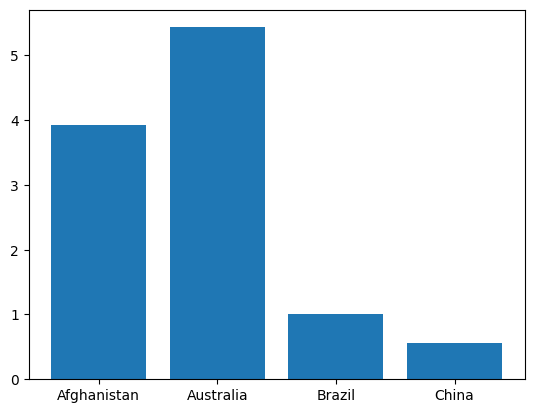

In [202]:
plt.bar(ülkeler,degerler)
plt.show()

In [3]:
df24 = pd.DataFrame(veri)
newCasesUSA = df24[df24['location'] == 'United States']
newCasesUSA = newCasesUSA['new_cases']
newCasesUSA.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newCasesUSA = newCasesUSA[newCasesUSA.index % 7 == 0]
newCasesUSA.head(50)

0            0.0
7            0.0
14           0.0
21           7.0
28           2.0
35          11.0
42           4.0
49          16.0
56          33.0
63         391.0
70        3465.0
77       27486.0
84       94894.0
91      176151.0
98      219172.0
105     196150.0
112     205165.0
119     198436.0
126     182246.0
133     169032.0
140     166325.0
147     146436.0
154     149780.0
161     151876.0
168     180021.0
175     258278.0
182     342166.0
189     392205.0
196     466267.0
203     467901.0
210     431250.0
217     375909.0
224     362662.0
231     315788.0
238     294946.0
245     295253.0
252     245621.0
259     280977.0
266     304774.0
273     298348.0
280     334249.0
287     387634.0
294     449438.0
301     559394.0
308     790094.0
315    1004845.0
322    1175483.0
329    1162401.0
336    1280932.0
343    1468482.0
Name: new_cases, dtype: float64

In [4]:
df25 = pd.DataFrame(veri)
newDeathsUSA = df25[df25['location'] == 'United States']
newDeathsUSA = newDeathsUSA['new_deaths']
newDeathsUSA.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newDeathsUSA = newDeathsUSA[newDeathsUSA.index % 7 == 0]
newDeathsUSA.head(50)

0          0.0
7          0.0
14         0.0
21         0.0
28         0.0
35         0.0
42         0.0
49         0.0
56         1.0
63        18.0
70        50.0
77       305.0
84      1732.0
91      6642.0
98     13889.0
105    15898.0
112    14899.0
119    13635.0
126    12758.0
133    10130.0
140     8558.0
147     6810.0
154     5987.0
161     5370.0
168     4455.0
175     6081.0
182     4451.0
189     5529.0
196     6666.0
203     7726.0
210     8146.0
217     7799.0
224     7404.0
231     6677.0
238     6343.0
245     5705.0
252     4977.0
259     5176.0
266     4776.0
273     4687.0
280     4615.0
287     4801.0
294     5723.0
301     6096.0
308     7204.0
315     8717.0
322    10820.0
329    11950.0
336    14801.0
343    17714.0
Name: new_deaths, dtype: float64

In [5]:
df26 = pd.DataFrame(veri)
newCasesSmoothedUSA = df26[df26['location'] == 'United States']
newCasesSmoothedUSA = newCasesSmoothedUSA['new_cases_smoothed']
newCasesSmoothedUSA.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
newCasesSmoothedUSA = newCasesSmoothedUSA[newCasesSmoothedUSA.index % 7 == 0]
newCasesSmoothedUSA.head(50)

0             NaN
7           0.000
14          0.000
21          1.000
28          0.286
35          1.571
42          0.571
49          2.286
56          4.714
63         55.857
70        495.000
77       3926.571
84      13556.286
91      25164.429
98      31310.286
105     28021.429
112     29309.286
119     28348.000
126     26035.143
133     24147.429
140     23760.714
147     20919.429
154     21397.143
161     21696.571
168     25717.286
175     36896.857
182     48880.857
189     56029.286
196     66609.571
203     66843.000
210     61607.143
217     53701.286
224     51808.857
231     45112.571
238     42135.143
245     42179.000
252     35088.714
259     40139.571
266     43539.143
273     42621.143
280     47749.857
287     55376.286
294     64205.429
301     79913.429
308    112870.571
315    143549.286
322    167926.143
329    166057.286
336    182990.286
343    209783.143
Name: new_cases_smoothed, dtype: float64

In [6]:
df27 = pd.DataFrame(veri)
diabetesPrevalenceUSA = df27[df27['location'] == 'United States']
diabetesPrevalenceUSA = diabetesPrevalenceUSA['diabetes_prevalence']
diabetesPrevalenceUSA.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
diabetesPrevalenceUSA = diabetesPrevalenceUSA[diabetesPrevalenceUSA.index % 7 == 0]
diabetesPrevalenceUSA.head(50)

0      10.79
7      10.79
14     10.79
21     10.79
28     10.79
35     10.79
42     10.79
49     10.79
56     10.79
63     10.79
70     10.79
77     10.79
84     10.79
91     10.79
98     10.79
105    10.79
112    10.79
119    10.79
126    10.79
133    10.79
140    10.79
147    10.79
154    10.79
161    10.79
168    10.79
175    10.79
182    10.79
189    10.79
196    10.79
203    10.79
210    10.79
217    10.79
224    10.79
231    10.79
238    10.79
245    10.79
252    10.79
259    10.79
266    10.79
273    10.79
280    10.79
287    10.79
294    10.79
301    10.79
308    10.79
315    10.79
322    10.79
329    10.79
336    10.79
343    10.79
Name: diabetes_prevalence, dtype: float64

In [7]:
df28 = pd.DataFrame(veri)
cardiovascDeathRateUSA = df28[df28['location'] == 'United States']
cardiovascDeathRateUSA = cardiovascDeathRateUSA['cardiovasc_death_rate']
cardiovascDeathRateUSA.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
cardiovascDeathRateUSA = cardiovascDeathRateUSA[cardiovascDeathRateUSA.index % 7 == 0]
cardiovascDeathRateUSA.head(50)

0      151.089
7      151.089
14     151.089
21     151.089
28     151.089
35     151.089
42     151.089
49     151.089
56     151.089
63     151.089
70     151.089
77     151.089
84     151.089
91     151.089
98     151.089
105    151.089
112    151.089
119    151.089
126    151.089
133    151.089
140    151.089
147    151.089
154    151.089
161    151.089
168    151.089
175    151.089
182    151.089
189    151.089
196    151.089
203    151.089
210    151.089
217    151.089
224    151.089
231    151.089
238    151.089
245    151.089
252    151.089
259    151.089
266    151.089
273    151.089
280    151.089
287    151.089
294    151.089
301    151.089
308    151.089
315    151.089
322    151.089
329    151.089
336    151.089
343    151.089
Name: cardiovasc_death_rate, dtype: float64

In [8]:
df29 = pd.DataFrame(veri)
populationUSA = df29[df29['location'] == 'United States']
populationUSA = populationUSA['population']
populationUSA.reset_index(drop=True, inplace=True)#ilk indeksi 0 dan başlattık
populationUSA = populationUSA[populationUSA.index % 7 == 0]
populationUSA.head(50)

0      338289856.0
7      338289856.0
14     338289856.0
21     338289856.0
28     338289856.0
35     338289856.0
42     338289856.0
49     338289856.0
56     338289856.0
63     338289856.0
70     338289856.0
77     338289856.0
84     338289856.0
91     338289856.0
98     338289856.0
105    338289856.0
112    338289856.0
119    338289856.0
126    338289856.0
133    338289856.0
140    338289856.0
147    338289856.0
154    338289856.0
161    338289856.0
168    338289856.0
175    338289856.0
182    338289856.0
189    338289856.0
196    338289856.0
203    338289856.0
210    338289856.0
217    338289856.0
224    338289856.0
231    338289856.0
238    338289856.0
245    338289856.0
252    338289856.0
259    338289856.0
266    338289856.0
273    338289856.0
280    338289856.0
287    338289856.0
294    338289856.0
301    338289856.0
308    338289856.0
315    338289856.0
322    338289856.0
329    338289856.0
336    338289856.0
343    338289856.0
Name: population, dtype: float64

In [9]:
X = np.column_stack((newCasesUSA, newCasesSmoothedUSA, diabetesPrevalenceUSA, cardiovascDeathRateUSA, populationUSA))
X.shape

(220, 5)

In [10]:
y =  (newDeathsUSA)
print(len(y))

220


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 455)

In [12]:
param_grid = {
    'n_estimators': list(range(50, 500,50 )),
    'max_depth': [10, 20]
}

In [13]:
best_score = float('inf')
best_params = None
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        
       
        model = RandomForestRegressor( n_estimators=n_estimators,max_depth=max_depth) 
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        
        if mse < best_score:
            best_score = mse
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}  
print("En iyi parametreler:", best_params)
print("En iyi skor:", best_score)

En iyi parametreler: {'n_estimators': 300, 'max_depth': 10}
En iyi skor: 20635087.32541807


In [14]:
rf=RandomForestRegressor( n_estimators=n_estimators,random_state=80,max_depth=max_depth)
rf.fit(X_train,y_train )
print("Train Başarısı = %",rf.score(X_train,y_train)*100)
print("Test Başarısı = %",rf.score(X_test,y_test)*100)

Train Başarısı = % 93.3130373495796
Test Başarısı = % 20.87537609689537


In [15]:
X_new = np.array([[100,20,5,150,1000000]])
USA=rf.predict(X_new)
USA


array([0.])